## DATA MINING and DATA WAREHOUSING
#### MINI PROJECT (Topic: CLASSIFICATION)

#### Submitted by: ABDUL SATTAR MAPARA | Guided by: DR. SHITAL RAUT MA'AM

#### AIM OF THE PROJECT
The project aims to use various functions/algorithms available in Python libraries for classification and compare the results.

#### DEPENDENCIES

* Programming Language used -
    Python version 3


* Libraries used -
    1. pandas - [https://pandas.pydata.org/](https://pandas.pydata.org/) for data manipulation and analysis
    1. matplotlib -[https://matplotlib.org/](https://matplotlib.org/) for data visualization
    1. seaborn - [https://seaborn.pydata.org/](https://seaborn.pydata.org/) for data visualization
    1. sklearn - [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/) for applying various classification algorithms/functions and generating performance reports (of the algorithms/functions)
    
    
* Dataset used is a public dataset -
    Iris Species dataset available at - [https://www.kaggle.com/uciml/iris](https://www.kaggle.com/uciml/iris) (UCI Machine Learning)

#### Importing the libraries and functions/methods required

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn import naive_bayes
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import random


#### Load the data

In [2]:
BASE_PATH = "../Data/"
path_to_data = BASE_PATH + "Iris/Iris.csv"
output_label = 'Species'

# Load the data
train_data = pd.read_csv(path_to_data).drop(['index'], axis=1)
# Shuffle the data
train_data = train_data.sample(frac=1).reset_index(drop=True)
print("DATA")
print(train_data.head())


DATA
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
0            5.7           2.9            4.2           1.3  Iris-versicolor
1            5.4           3.4            1.5           0.4      Iris-setosa
2            6.3           2.7            4.9           1.8   Iris-virginica
3            5.0           3.2            1.2           0.2      Iris-setosa
4            5.4           3.4            1.7           0.2      Iris-setosa


#### Visualizing the data

DATA SHAPE -  (150, 5)


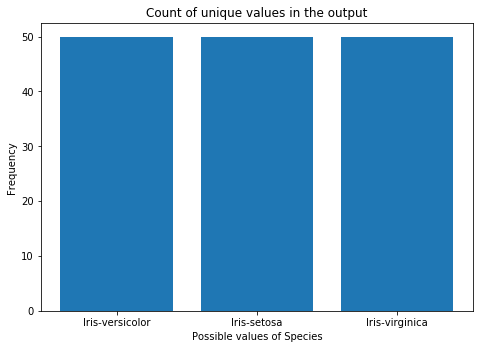

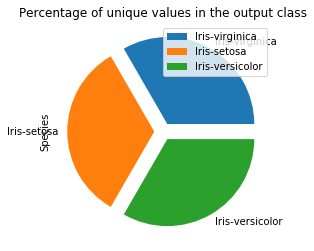

PAIRPLOT- 


<Figure size 432x288 with 0 Axes>

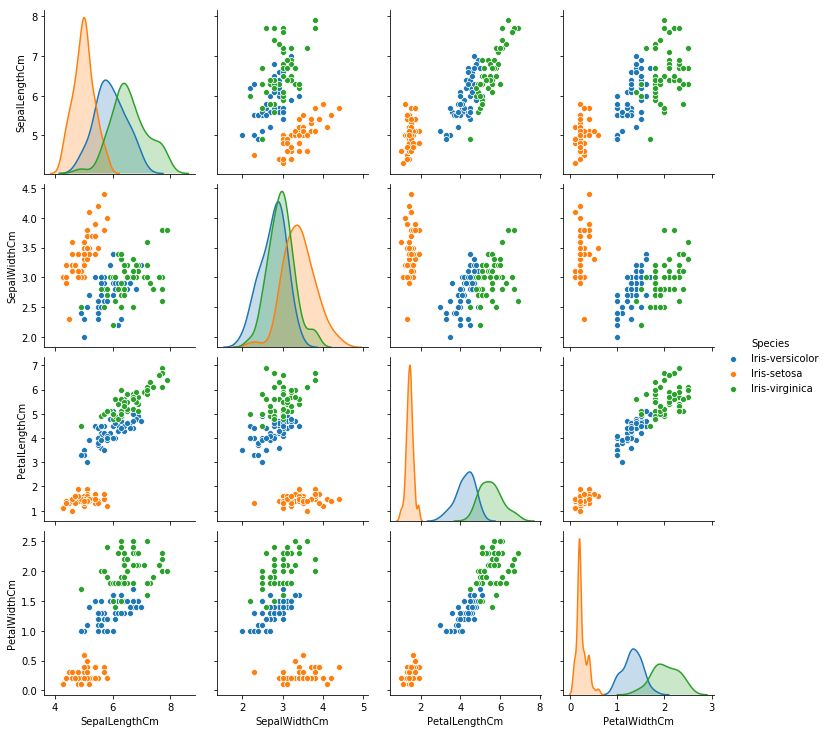

<Figure size 432x288 with 0 Axes>

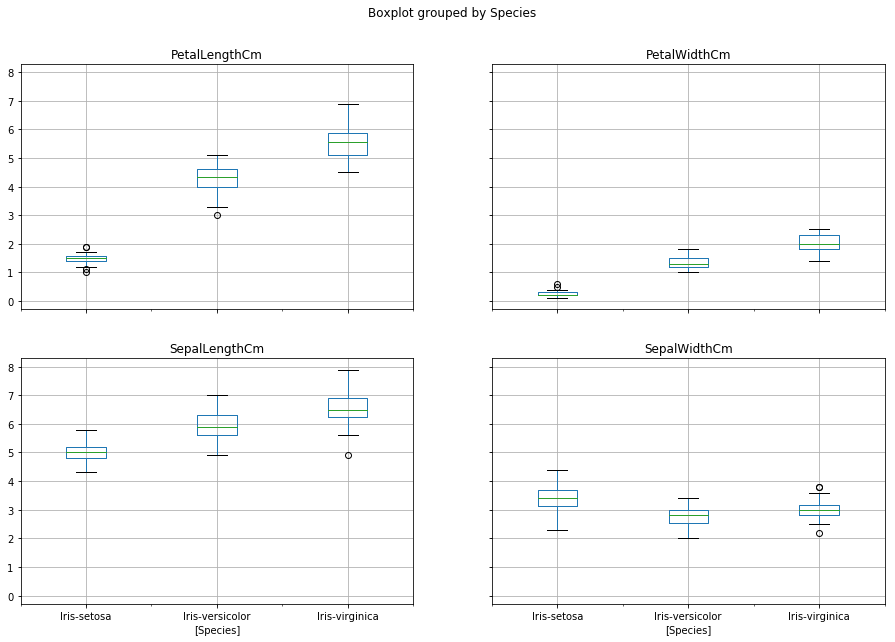

PARALLEL CO-ORDINATE PLOT


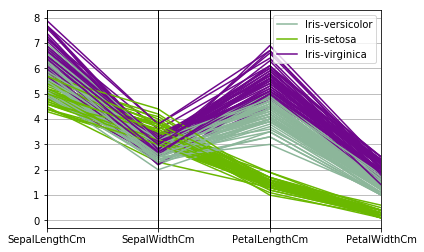

DISTRIBUTION PLOT - 


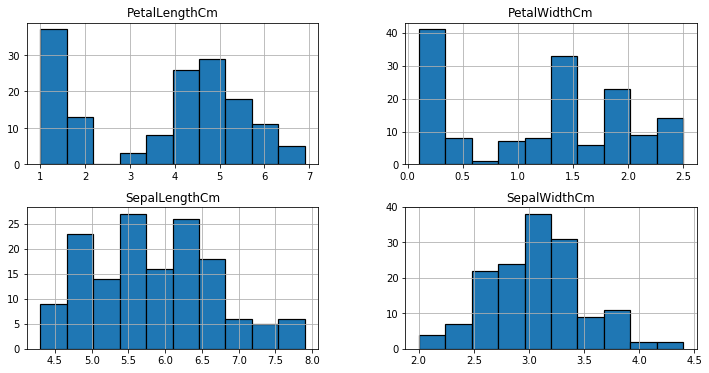

In [3]:
print("DATA SHAPE - ", train_data.shape)

# Bar Plot for visualizing - Count of unique values in the output class
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Count of unique values in the output')
ax.set_xlabel('Possible values of '+ output_label)
ax.set_ylabel('Frequency')
possible_outputs = train_data[output_label].unique().tolist()
count_outputs = train_data[output_label].value_counts()
ax.bar(possible_outputs,count_outputs)
plt.show()

# Pie Chart - Percentage of unique values in the output class
count_outputs.plot.pie(explode=[0.1,0.1,0.1])
plt.title('Percentage of unique values in the output class')
plt.legend()
plt.show()

# Pairplot
# Pairwise is useful when one wants to visualize the distribution of a variable or the relationship 
# between multiple variables separately within subsets of the dataset.

print("PAIRPLOT- ")
plt.figure()
sns.pairplot(train_data, hue = output_label)
plt.show()

# Boxplot - Outlier Analysis
plt.figure()
train_data.boxplot(by=output_label, figsize=(15, 10))
plt.show()

# Parallel coordinate plot: 
# This type of visualisation is used for plotting multivariate, numerical data. 
# Parallel Coordinates Plots are ideal for comparing many variables together 
# and seeing the relationships between them
print('PARALLEL CO-ORDINATE PLOT')
pd.plotting.parallel_coordinates(train_data, output_label)
plt.ioff()
plt.show()

# Distribution plot
# Distribution plot is suitable for comparing range and distribution for groups of numerical data. 
# Data is plotted as value points along an axis
print('DISTRIBUTION PLOT - ')
train_data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)



#### Analysis

From the data visualizations, we note a few points:
- We do not need to deal with the problem of Class Imbalance for this dataset 
    (as each class has equal representation in the data)
- From the pairplot, we observe that the Iris-setosa species is separated from the other two across all feature combinations. Hence, the class Iris-setosa is linearly-seperable from the other two.
- Moreover from the visualizations above, we can conclude that the other two classes are not linearly-seperable
- The data needs to be scaled as some of the features have very large values compared to others (In particular, Data scaling is important as we calculate distance between two data points)

#### Preprocess the data

After visualizing the data and getting the insights, we decide to scale the feature values in a certain range. The following snippet involves scaling all the features in a certain range and then splitting the avalaible data into Train and Test data

In [4]:
# Define scaler for scaling the features in a range
min_max_scaler = preprocessing.MinMaxScaler()

# Divide data into attributes and labels
X = train_data.drop(output_label, axis = 1)
Y = train_data[output_label]
num_classes = len(Y.unique())
# Scale X
X = min_max_scaler.fit_transform(X)

# Set seed randomly
seed = random.randrange(1,10)
print("SEED = ", seed)
'''
K-Folds cross-validator is used that provides train/test indices to split data in train/test sets. 
It splits the dataset into k consecutive folds (with shuffing if shuffle=True).
Each fold is then used once as a validation while the k - 1 remaining folds form the training set.
'''
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)

# In addition to K-Fold Cross Validator, we use the Holdout method
# In this method (Holdout method), the given data are randomly partitioned 
# into two independent sets (train and test set)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


SEED =  4


#### Define Data Structures 

In [5]:
models = []
algorithm_report = []
abbrevations = {}


#### CLASSIFICATION TECHNIQUES -

#### 1. DECISION TREE CLASSIFIER



In [6]:
algorithm = "DECISION TREE CLASSIFIER"
abbrevations[algorithm] = "DT"
# Uses Gini impurity
dt_classifier = DecisionTreeClassifier(criterion='gini',class_weight=None, ccp_alpha=0.01) #ccp_alpha is a Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen
models.append((algorithm,dt_classifier))

#### 2. K-NEAREST NEIGHBOR CLASSIFIER

In [7]:
algorithm = "K-NEAREST NEIGHBOR CLASSIFIER"
abbrevations[algorithm] = "KNN"
# Using weights='distance', closer neighbors of a query point will have a greater influence than neighbors which are further away.
k_neighbors_classifier = KNeighborsClassifier(n_neighbors=7, weights='distance')
models.append((algorithm, k_neighbors_classifier))


#### 3. NAIVE BAYES CLASSIFIER

In [8]:
algorithm = "NAIVE BAYES CLASSIFIER"
abbrevations[algorithm] = "N-BAYES"
# Using Gaussian Naive Bayes algorithm
gnb = naive_bayes.GaussianNB()
models.append((algorithm,gnb))

#### 4. SUPPORT VECTOR MACHINE (SVM)

In [9]:
algorithm = "SVM CLASSIFIER"
abbrevations[algorithm] = "SVM"
# We use the C-Support Vector Classification
# Here C is the Regularization parameter
# rbf kernel used, gamma is the kernel coefficient for ‘rbf’
svm_classifier = svm.SVC(decision_function_shape='ovr', gamma=2,C=1, max_iter=1000)
models.append((algorithm, svm_classifier))


#### 5. LINEAR CLASSIFIER with STOCHASTIC GRADIENT DESCENT (SGD) TRAINING

In [10]:
algorithm = "LINEAR CLASSIFIER with STOCHASTIC GRADIENT DESCENT"
abbrevations[algorithm] = "SGD"
# loss = hinge gives a linear Support Vector Machine
sgd_classifier = SGDClassifier(loss='hinge',penalty='l2',alpha=0.001,max_iter=10000,learning_rate='optimal', validation_fraction=0.2, tol=1e-3)
models.append((algorithm,sgd_classifier))


#### 6. MULTI-LAYER PERCEPTRON (MLP) CLASSIFIER

In [11]:
# multi-layer perceptron (MLP) algorithm that is trained using Backpropagation
algorithm = "MULTI-LAYER PERCEPTRON"
abbrevations[algorithm] = "MLP"
mlp_classifier = MLPClassifier(hidden_layer_sizes=(15,),activation='relu', solver='sgd', validation_fraction=0.1, max_iter=7000)
models.append((algorithm,mlp_classifier))

#### 7. RIDGE CLASSIFIER

In [12]:
algorithm = "RIDGE CLASSIFIER"
abbrevations[algorithm] = "RIDGE"
ridge_classifier = RidgeClassifier()
models.append((algorithm, ridge_classifier))

#### 8. RANDOM FOREST CLASSIFIER

In [13]:
algorithm = "RANDOM FOREST"

# A random forest is a meta estimator that fits a number of decision tree classifiers 
# on various sub-samples of the dataset and 
# uses averaging to improve the predictive accuracy and control over-fitting.
abbrevations[algorithm] = "RF"
random_forest = RandomForestClassifier(max_depth=2, random_state=0)
models.append((algorithm, random_forest))


#### 9. BAGGING CLASSIFIER

In [14]:
algorithm = "BAGGING CLASSIFIER" #One of the Ensemble Methods
# Fits base classifiers on subsets (chosen randomly) of the original data and 
# then accumulate their individual predicted values (either by voting or by averaging) to form a final prediction.
abbrevations[algorithm] = "BAGGING"
bagging_classifier = BaggingClassifier(base_estimator=svm.SVC(gamma=2),n_estimators=10, random_state=0)
models.append((algorithm, bagging_classifier))

#### 10. ADABOOST CLASSIFIER

In [15]:
algorithm = "ADABOOST CLASSIFIER"
# Fits on the original dataset, then fits again on copies of the dataset by increasing the weights of incorrectly
# classified instances
abbrevations[algorithm] = "AB"
adaboost_classifier = AdaBoostClassifier(algorithm='SAMME.R',n_estimators=50, random_state=seed)
models.append((algorithm, adaboost_classifier))

#### FITTING the CLASSIFICATION MODELS (on the training data) AND
#### Generating PERFORMANCE REPORT (using the testing data)

ALGORITHM: DECISION TREE CLASSIFIER
CONFUSION MATRIX
 [[23  0  0]
 [ 0 15  2]
 [ 0  1  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       0.94      0.88      0.91        17
 Iris-virginica       0.82      0.90      0.86        10

       accuracy                           0.94        50
      macro avg       0.92      0.93      0.92        50
   weighted avg       0.94      0.94      0.94        50



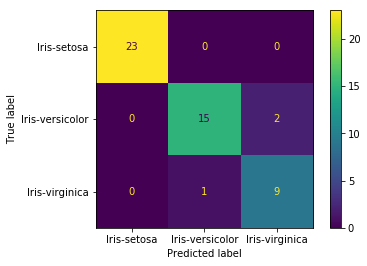

ALGORITHM: K-NEAREST NEIGHBOR CLASSIFIER
CONFUSION MATRIX
 [[23  0  0]
 [ 0 16  1]
 [ 0  1  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.96        50
      macro avg       0.95      0.95      0.95        50
   weighted avg       0.96      0.96      0.96        50



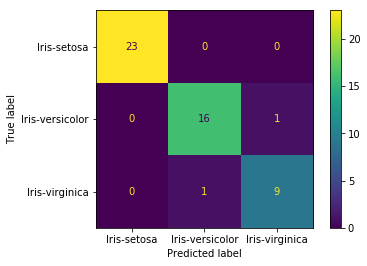

ALGORITHM: NAIVE BAYES CLASSIFIER
CONFUSION MATRIX
 [[23  0  0]
 [ 0 16  1]
 [ 0  1  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.96        50
      macro avg       0.95      0.95      0.95        50
   weighted avg       0.96      0.96      0.96        50



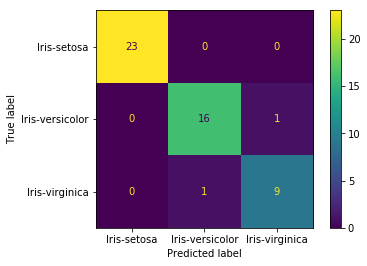

ALGORITHM: SVM CLASSIFIER
CONFUSION MATRIX
 [[23  0  0]
 [ 0 16  1]
 [ 0  1  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.96        50
      macro avg       0.95      0.95      0.95        50
   weighted avg       0.96      0.96      0.96        50



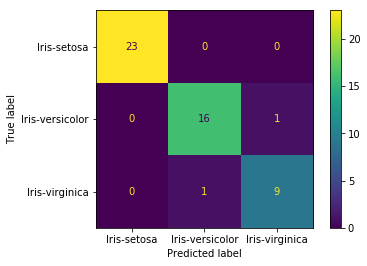

ALGORITHM: LINEAR CLASSIFIER with STOCHASTIC GRADIENT DESCENT
CONFUSION MATRIX
 [[22  1  0]
 [ 0 13  4]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.96      0.98        23
Iris-versicolor       0.93      0.76      0.84        17
 Iris-virginica       0.71      1.00      0.83        10

       accuracy                           0.90        50
      macro avg       0.88      0.91      0.88        50
   weighted avg       0.92      0.90      0.90        50



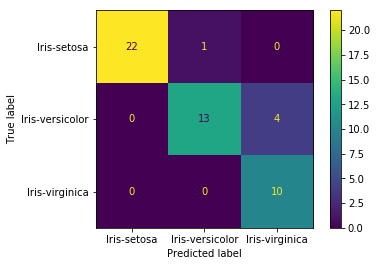

ALGORITHM: MULTI-LAYER PERCEPTRON
CONFUSION MATRIX
 [[23  0  0]
 [ 0 16  1]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.98        50
      macro avg       0.97      0.98      0.97        50
   weighted avg       0.98      0.98      0.98        50



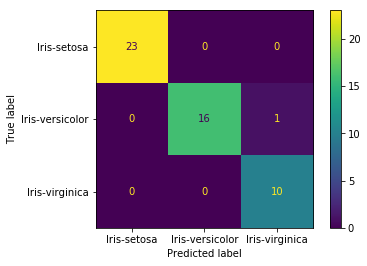

ALGORITHM: RIDGE CLASSIFIER
CONFUSION MATRIX
 [[23  0  0]
 [ 0  9  8]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       1.00      0.53      0.69        17
 Iris-virginica       0.56      1.00      0.71        10

       accuracy                           0.84        50
      macro avg       0.85      0.84      0.80        50
   weighted avg       0.91      0.84      0.84        50



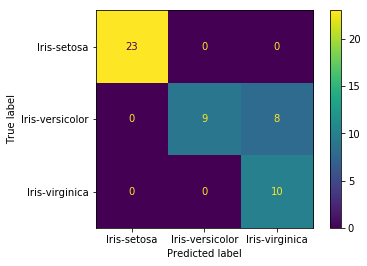

ALGORITHM: RANDOM FOREST
CONFUSION MATRIX
 [[23  0  0]
 [ 0 16  1]
 [ 0  1  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.96        50
      macro avg       0.95      0.95      0.95        50
   weighted avg       0.96      0.96      0.96        50



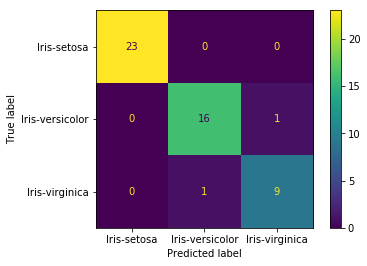

ALGORITHM: BAGGING CLASSIFIER
CONFUSION MATRIX
 [[23  0  0]
 [ 0 17  0]
 [ 0  1  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.98        50
      macro avg       0.98      0.97      0.97        50
   weighted avg       0.98      0.98      0.98        50



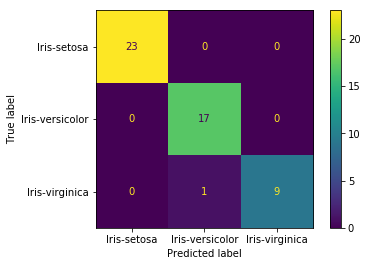

ALGORITHM: ADABOOST CLASSIFIER
CONFUSION MATRIX
 [[23  0  0]
 [ 0 16  1]
 [ 0  1  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.96        50
      macro avg       0.95      0.95      0.95        50
   weighted avg       0.96      0.96      0.96        50



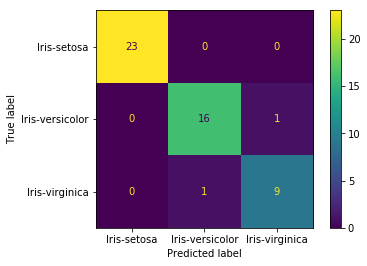

In [16]:
from sklearn.metrics import precision_recall_curve
for algorithm, model in models:
	print("ALGORITHM: " + algorithm)
	model.fit(X_train, y_train)
	y_pred = model.predict(X_test)
	print("CONFUSION MATRIX\n", confusion_matrix(y_test, y_pred))
	print(classification_report(y_test, y_pred))
	plot_confusion_matrix(model, X_test, y_test)
	plt.show()
	accuracy = model.score(X=X_test, y=y_test)*100
	report = classification_report(y_test, y_pred, output_dict=True)
	algorithm_report.append((algorithm, accuracy,report['weighted avg']['f1-score'],
                               report['weighted avg']['recall'],report['weighted avg']['precision']))


#### Summary of accuracy of the classifiers

In [17]:
print("======================SUMMARY===============================")
print("%55s\t\tACCURACY F1   RECALL PRECISION"%"ALGORITHM")
for algorithm, accuracy, f1, recall, precision in algorithm_report:
	print("%55s\t\t%3.2f \t%3.2f \t%3.2f \t%3.2f"%(algorithm + '('+ abbrevations[algorithm] +')', accuracy, f1, recall, precision))


======================SUMMARY===============================
                                              ALGORITHM		ACCURACY F1   RECALL PRECISION
                           DECISION TREE CLASSIFIER(DT)		94.00 	0.94 	0.94 	0.94
                     K-NEAREST NEIGHBOR CLASSIFIER(KNN)		96.00 	0.96 	0.96 	0.96
                        NAIVE BAYES CLASSIFIER(N-BAYES)		96.00 	0.96 	0.96 	0.96
                                    SVM CLASSIFIER(SVM)		96.00 	0.96 	0.96 	0.96
LINEAR CLASSIFIER with STOCHASTIC GRADIENT DESCENT(SGD)		90.00 	0.90 	0.90 	0.92
                            MULTI-LAYER PERCEPTRON(MLP)		98.00 	0.98 	0.98 	0.98
                                RIDGE CLASSIFIER(RIDGE)		84.00 	0.84 	0.84 	0.91
                                      RANDOM FOREST(RF)		96.00 	0.96 	0.96 	0.96
                            BAGGING CLASSIFIER(BAGGING)		98.00 	0.98 	0.98 	0.98
                                ADABOOST CLASSIFIER(AB)		96.00 	0.96 	0.96 	0.96


#### Analysis & Comparative Statements using Results obtained
Higher accuracy, f1-score, recall and precision on test done on the testing data is desired.

- Decision Tree Classifier achieved a decent accuracy, f1-score, recall and precision. However, all these values are not as good as compared to some other classifiers like SVM and MLP.
- KNN Classifier achieved decent scores. It achieved better results compared with Decision Tree, and a few other classifiers including Ridge Classifier and Linear Classifier (with SGD).
- Naive Bayes Classifier, SVM, Random Forest and Adaboost classifier achieved the accuracy, f1-score, precision and recall similar to KNN.
- Linear Classifier (with SGD) achieved lower & undesirable scores compared with most other classifiers. It may be because, we deduced, from data visualization that two of the three classes are not linearly seperable in the dataset used.
- Multi-Layer Perceptron (trained using Backpropagation) achieved the best results among all. Its outstanding results make it qualified for further use (for prediction) on the dataset used.
- Ridge Classifier performed the worst among all in all aspects. It may be because it is designed to be better suited to Regression problems rather than Classification problems.
- Bagging Classifier also achieved the best results among all. Thus, it also deserves consideration for use in prediction.

#### COMPARATIVE STUDY of the classifiers using K-FOLD CROSS VALIDATION
The K-fold cross validation procedure is used to evaluate each classifier, configured with the same random seed to ensure that the same splits to the training data are performed and that each algorithms is evaluated in the same way.



                                         ALGORITHM MEAN-ACCURACY	STANDARD-DEVIATION-ACCURACY
                          DECISION TREE CLASSIFIER 0.960		0.033
                     K-NEAREST NEIGHBOR CLASSIFIER 0.953		0.043
                            NAIVE BAYES CLASSIFIER 0.953		0.060
                                    SVM CLASSIFIER 0.973		0.033
LINEAR CLASSIFIER with STOCHASTIC GRADIENT DESCENT 0.880		0.065
                            MULTI-LAYER PERCEPTRON 0.967		0.045
                                  RIDGE CLASSIFIER 0.833		0.095
                                     RANDOM FOREST 0.947		0.050
                                BAGGING CLASSIFIER 0.973		0.033
                               ADABOOST CLASSIFIER 0.940		0.055


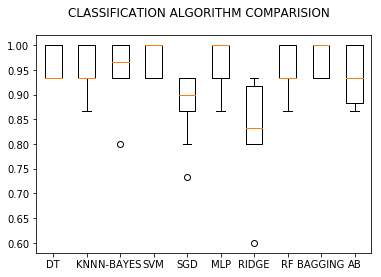

In [18]:
import warnings
results = []
names = []
warnings.filterwarnings('ignore')
print("\n%50s MEAN-ACCURACY\tSTANDARD-DEVIATION-ACCURACY"%"ALGORITHM")
for algorithm, model in models:
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(abbrevations[algorithm])
	information = "%50s %.3f\t\t%.3f" % (algorithm, cv_results.mean(), cv_results.std())
	print(information)

# boxplot for algorithm comparison
fig = plt.figure()
fig.suptitle('CLASSIFICATION ALGORITHM COMPARISION')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Analysis & Comparative Statements using Results from K-Fold Cross Validation

Higher the mean-accuracy and lower the standard deviation, the better. Algorithms/Classifiers that have medians of the accuracies obtained closer to 1.00 are preferred. Moreover, algorithms/classifiers achieving lower accuracies in some train-test splits are considered inconsistent, hence will be less preferred.
In the case above, Linear Classifier scored a low accuracy (of about 80%) in one train-test split, hence can be considered inconsistent. It may be because, we deduced that two of the three classes are not linearly-separable in the data considered.

- The Decision Tree Classifier performs decently, although its median is on the lower side. 
- Decent performance is also achieved by KNN classifier, however, its median is on the lower side and it obtained a lower accuracy score (around 86%) in one scenario.
- Gaussian Naive Bayes Classifier achieves a good mean & median accuracies. One case in which it obtained a lower accuracy does produce a significant question mark in considering it for the dataset.
- Support Vector Machine (with rbf kernel) is a powerful technique and hence achieves the best results for the dataset used. Its mean & median accuracies are highest and standard deviation is the lowest i.e it had performed consistently all K times and is a good choice for the model considered.
- Multi-Layer Perceptron (MLP) achieved a good accuracy score (both mean & median). Its median is also on the higher side. However, it did not perform as consistently as SVM.
- Ridge Classifier achieves a low accuracy score and its boxplot spans longer height, which makes it inconsistent.
- Random Forest achieves decent mean accuracy but its median accuracy is lower. Also, it is not as inconsistent as SVM.
- Bagging Classifier is a powerful technique and hence achieves the best results for the dataset used. Its mean & median accuracies are highest and standard deviation is the lowest i.e it had performed consistently all K times and is a good choice for the model considered.
- Adaboost Classifier did not achieve a bad mean accuracy. However, its median accuracy is relatively low and inconsistency in its performance for different train-test split can be observed.

#### Conclusive COMPARATIVE STATEMENTS - 

Here, we consider the <b>accuracy, f1-score, precision and recall</b> obtained on testing the classifiers on test data and also the <b>box plot</b> obtained on performing <b>K-Fold Cross Validation</b>.

Evaluating an algorithm based on accuracies obtained on K different train-test splits makes more sense, as it helps us know which algorithm will generalize better. Hence, <b>Bagging Classifier, SVM Classifier with 'rbf' kernel that achieved the best results and also Multi-Layer Perceptron (that achieved decent mean accuracy, standard deviation and the best median accuracy in K-fold cross validation and the best f1-score, precision and recall) deserves the selection for further use (for prediction) on the data.</b>

